scikit-learnに内包されている、アメリカウィスコンシン州の乳がんのデータ元に、良性・悪性の二値分類を行って下さい。
評価は、F1スコアで評価した結果が良くなるように、アルゴリズム選定から、説明変数の選定及びパラメータ調整を行って下さい。

最終的な目的は、汎化性能が高いモデルを構築することです。
用いて良いツールは、scikit-learnのみとし、ディープラーニングなどの別の手法は採用しないものとします。

In [1]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

以下は回答例

In [2]:
X = X[:, :10]
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
y_pred = clf.predict(X)

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9086115992970123

In [4]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.83      0.87       212
          1       0.90      0.96      0.93       357

avg / total       0.91      0.91      0.91       569



# 回答は以下

以下にセルを追加して、実装を書き加えてください。

In [1]:
#乳がんのデータ元に、良性・悪性の二値分類を行う
#ステップ
#①ロジスティック回帰にて精度を確認
#②相関があり、主成分分析によって次元圧縮に効果があるか確認
#③主成分分析を行い、次元圧縮を実行
#④次元圧縮を行ったデータでロジスティック回帰を行い、①の結果と比較
#⑤K最近傍による予測モデルを実行
#⑥サポートベクタマシンによる予測モデルを実行
#
#備考
#実行には以下のサイトを参考にした
# https://ohke.hateblo.jp/entry/2017/08/11/230000
# 

# Updated by Hirotaka Yamamoto
# 2019/07/19

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

# データ読込
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [8]:
#標準化
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [9]:
# ロジスティック回帰-アルゴリズム読み込み（10分割交差検証）
clf = LogisticRegressionCV(cv=10, random_state=0)
clf.fit(X, y)
y_pred = clf.predict(X)

In [10]:
#精度
accuracy_score(y, y_pred)

0.9876977152899824

In [11]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       212
          1       0.99      0.99      0.99       357

avg / total       0.99      0.99      0.99       569



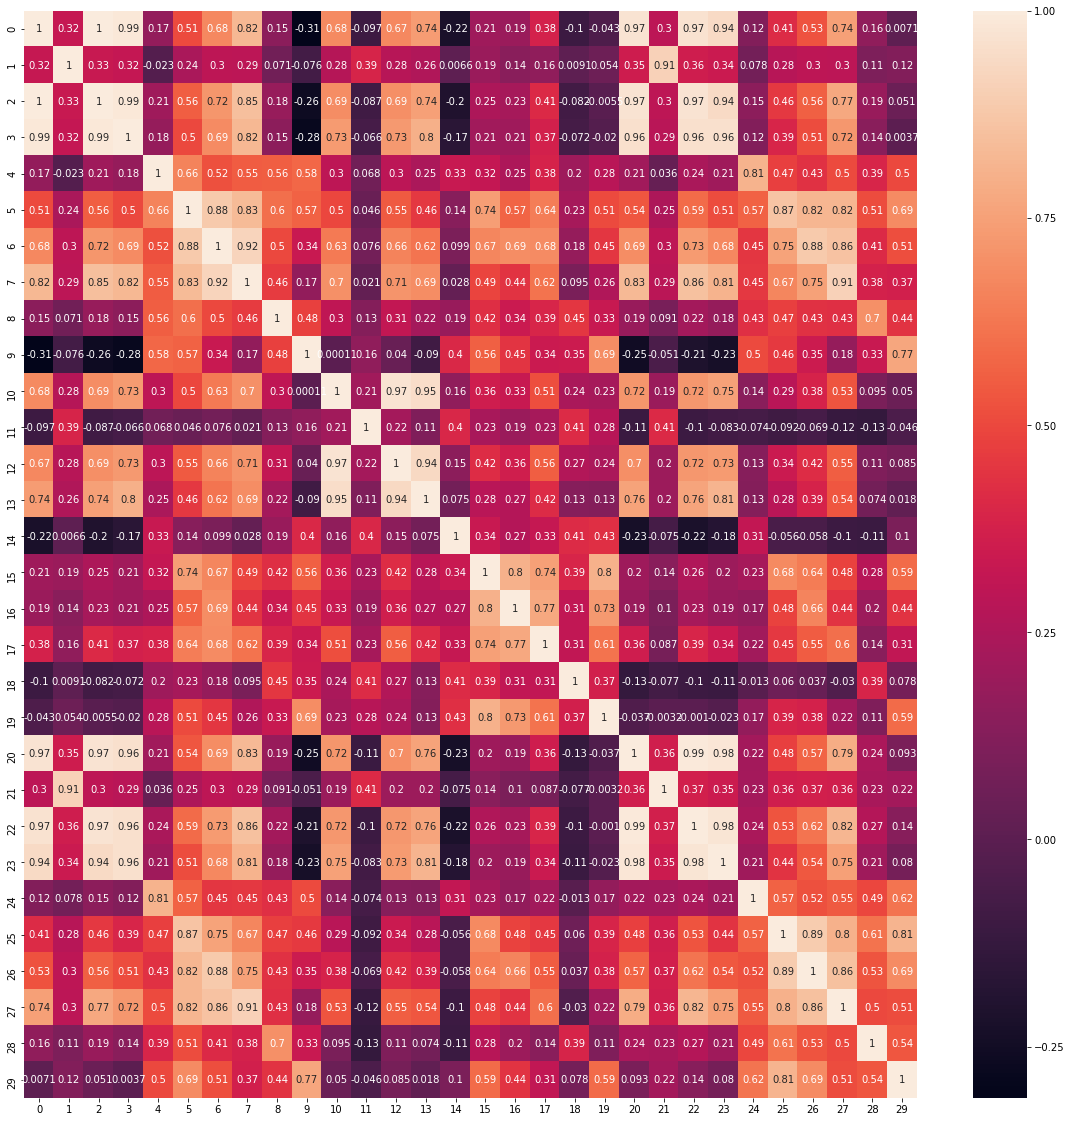

In [12]:
#現状の説明変数に相関が高そうか(次元圧縮が有効そうか)を確認する
plt.figure(figsize=(20, 20))
seaborn.heatmap(pd.DataFrame(X).corr(), annot=True)

<Container object of 30 artists>

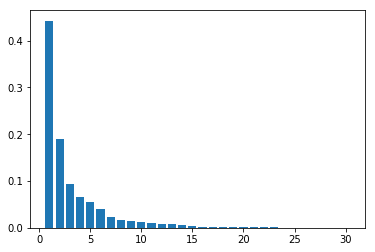

In [13]:
#寄与率を確認
pca = PCA(n_components=30)
pca.fit(X)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

In [14]:
# 次元数を5つに圧縮（80%以上）
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
print('X shape: {}'.format(X_pca.shape))

# 寄与率
print('Explained variance ratio: {}'.format(pca.explained_variance_ratio_))

#次元圧縮の確認
print('Original shape: {}'.format(str(X.shape)))
print('Reduced shape: {}'.format(str(X_pca.shape)))

X shape: (569, 5)
Explained variance ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]
Original shape: (569, 30)
Reduced shape: (569, 5)


In [15]:
# ロジスティック回帰（10分割交差検証）
clf = LogisticRegressionCV(cv=10, random_state=0)
clf.fit(X_pca, y)
y_pred = clf.predict(X_pca)
print("精度 = ", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

精度 =  0.9753954305799648
             precision    recall  f1-score   support

          0       0.98      0.96      0.97       212
          1       0.98      0.99      0.98       357

avg / total       0.98      0.98      0.98       569



In [16]:
#全ての説明変数を使った場合と比較して1.2%ほど低下したが、悪くない精度であると言える。
#続けて他の機械学習モデルにて精度を確認する

In [17]:
# K最近傍
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_pca, y)
y_pred = clf.predict(X_pca)
print("精度 = ", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

精度 =  0.9753954305799648
             precision    recall  f1-score   support

          0       0.98      0.95      0.97       212
          1       0.97      0.99      0.98       357

avg / total       0.98      0.98      0.98       569



In [18]:
# サポートベクタマシン 
clf = LinearSVC()
clf.fit(X_pca, y)
y_pred = clf.predict(X_pca)
print("精度 = ", accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

精度 =  0.9789103690685413
             precision    recall  f1-score   support

          0       0.98      0.97      0.97       212
          1       0.98      0.99      0.98       357

avg / total       0.98      0.98      0.98       569



In [20]:
#ロジスティック回帰以外に2つの種類の機械学習を試してみたところ、結果的にはサポートベクタマシンの精度が高かった。
#結果として、次元数が5つで精度97.9%のモデルができたと言える。